In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [5]:
df.drop('Serial No.', axis=1, inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Exploration

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Text(0.5, 1.0, 'CORRELATION FACTORS')

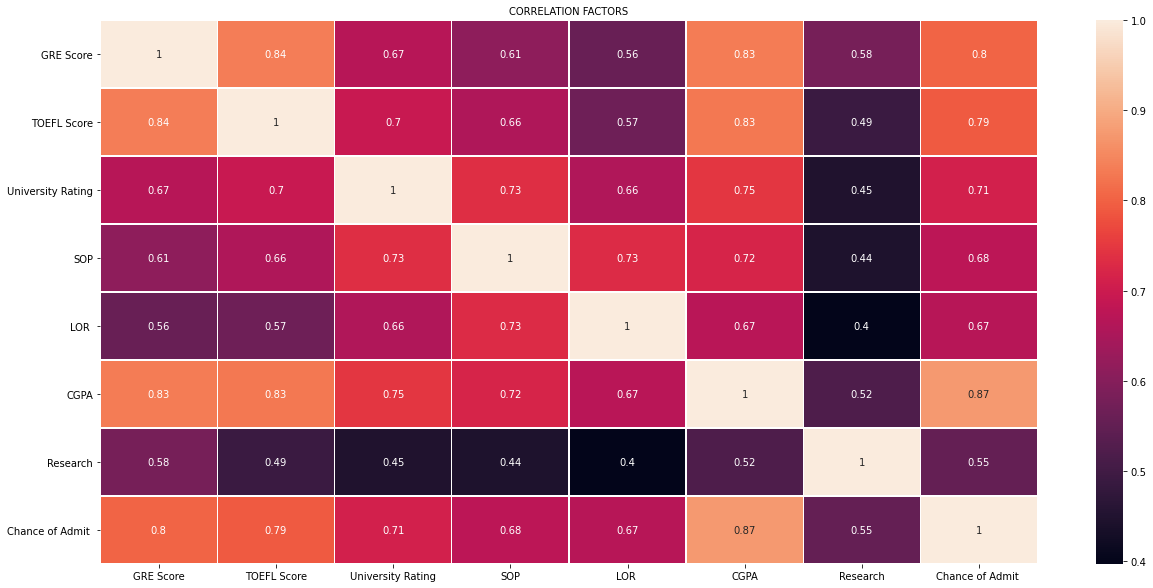

In [8]:
hmap=df.corr()
plt.figure(figsize = (21,10))
sns.heatmap(hmap, annot=True, linewidth=0.5).set_title("CORRELATION FACTORS",size=10)

In [9]:
# Isolating GRE Score data
GRE = pd.DataFrame(df['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


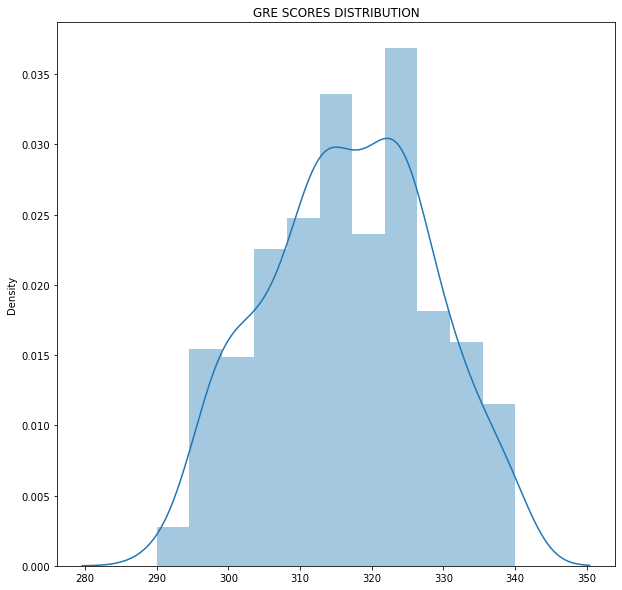

In [10]:
#Plot for GRE scores
plt.figure(figsize=(10,10))
sns.distplot(GRE).set_title("GRE SCORES DISTRIBUTION")
plt.show()

In [11]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(df['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


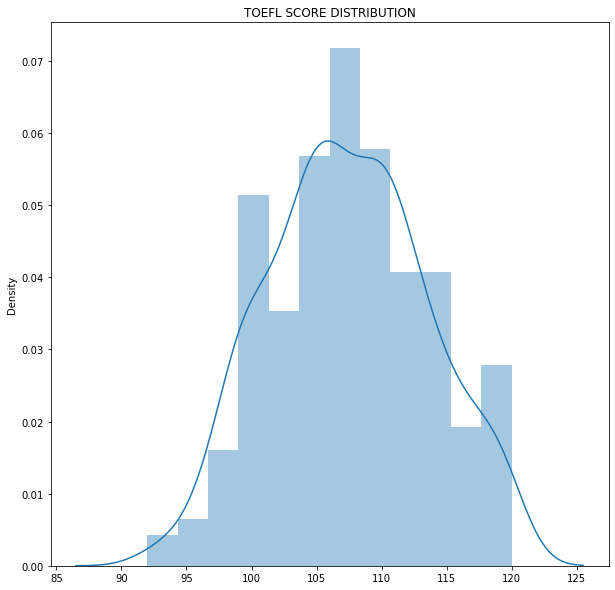

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(TOEFL).set_title('TOEFL SCORE DISTRIBUTION')
plt.show()

In [13]:
#Isolating and describing CGPA
CGPA=pd.DataFrame(df['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


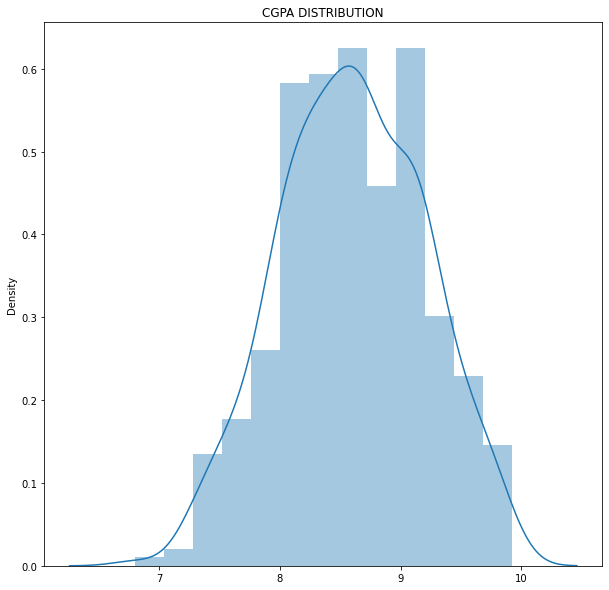

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(CGPA).set_title('CGPA DISTRIBUTION')
plt.show()

In [15]:
#Isolating and describing University Rating
rating=df.groupby(['University Rating']).count()
rating = rating['GRE Score']
rating = pd.DataFrame(rating)
rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


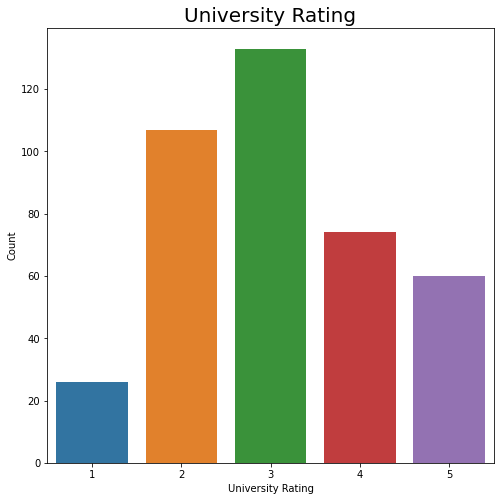

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(rating.index, rating['Count']).set_title('University Rating', size='20')
plt.show()

In [17]:
#Isolating and describing SOP
SOP = pd.DataFrame(df.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,20
2.0,33
2.5,47
3.0,64
3.5,70
4.0,70
4.5,53
5.0,37


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


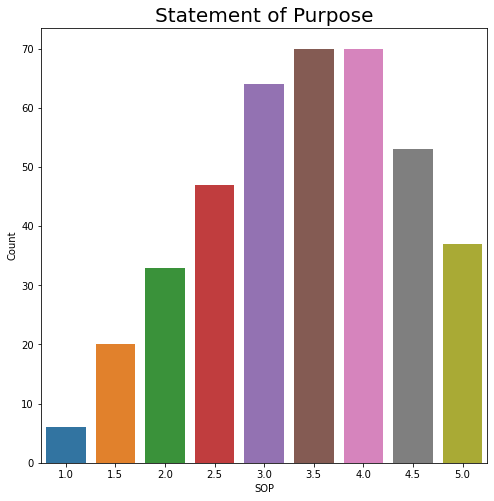

In [18]:
plt.figure(figsize=(8,8))
sns.barplot(SOP.index, SOP['Count']).set_title('Statement of Purpose', size='20')
plt.show()

In [19]:
#Isolating and describing LOR
LOR = pd.DataFrame(df.groupby(['LOR ']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,7
2.0,38
2.5,39
3.0,85
3.5,73
4.0,77
4.5,45
5.0,35


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


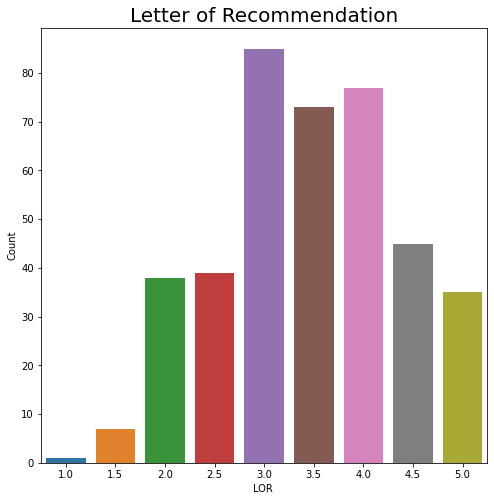

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(LOR.index, LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

In [21]:
#Discussing Chance of Admit
df.describe()['Chance of Admit ']

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


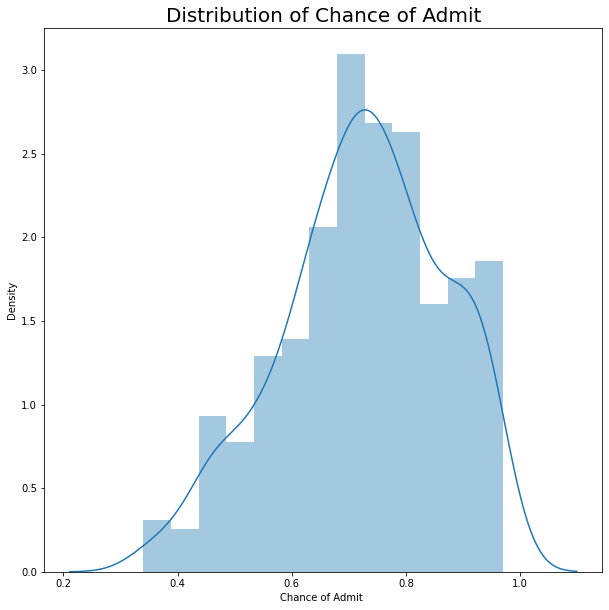

In [22]:
plt.figure(figsize=(10,10))
df['Chance of Admit ']
sns.distplot(df['Chance of Admit ']).set_title('Distribution of Chance of Admit', size='20')
plt.show()

Since, our goal is to predict the chance of admission, correlations of different variables with it:

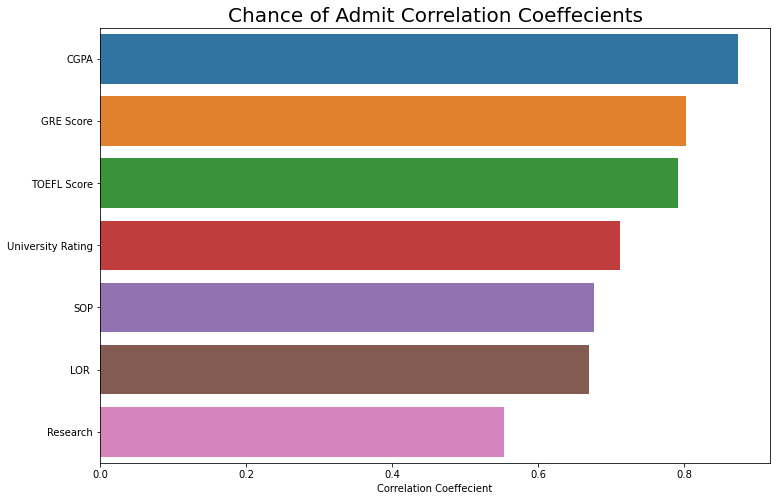

In [23]:
COA_corr = pd.DataFrame(df.corr()['Chance of Admit '])
COA_corr.rename({'Chance of Admit ': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit ', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']

plt.figure(figsize=(12,8))
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

# Clustering

In [4]:
data = pd.read_csv(r"D:\admission.csv")
data.shape

(400, 9)

In [19]:
data = data.rename(columns = {'Chance of Admit ':'ChanceOfAdmit'})
serial = data["Serial No."]
data.drop(["Serial No."],axis=1,inplace = True)

In [20]:
X = data.drop(["ChanceOfAdmit"],axis=1)
y = data.ChanceOfAdmit

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

KMeans Clustering

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


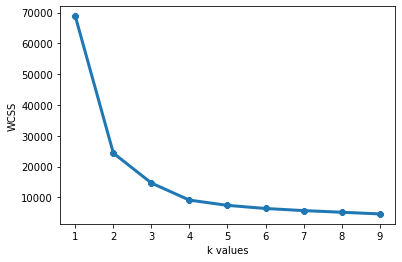

In [22]:
data["Serial No."] = serial
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,linewidth=3,marker="8")
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

Elbow can be seen at 2 clusters, since silhoutte score of 2 clusters is better than 3, we take 2 clusters

In [23]:
km = KMeans(n_clusters=2, random_state=1)
km_pred= km.fit_predict(data)
labels= km.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, km.labels_, metric='euclidean')

In [25]:
print("Silhoutte_score:", score)

Silhoutte_score: 0.607084476401676


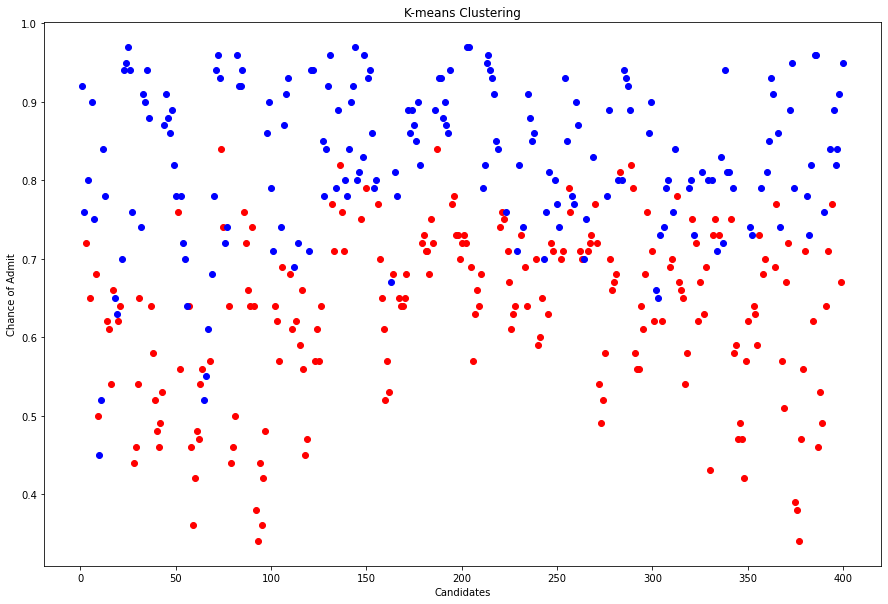

In [26]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)


data["label_kmeans"] = clusters

plt.figure(figsize=(15,10))

plt.scatter(data[data.label_kmeans == 0 ]["Serial No."], data[data.label_kmeans == 0].ChanceOfAdmit,color = "red")
plt.scatter(data[data.label_kmeans == 1 ]["Serial No."], data[data.label_kmeans == 1].ChanceOfAdmit,color = "blue")
plt.title("K-means Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

In [ ]:
data["Serial No."] = serial
plt.figure(figsize=(15,10))
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(X, method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3, affinity= "euclidean", linkage = "ward")
clusters_hiyerartical = hiyerartical_cluster.fit_predict(X)

data["label_hiyerartical"] = clusters_hiyerartical
plt.figure(figsize=(15,10))
plt.scatter(data[data.label_hiyerartical == 0 ]["Serial No."],data[data.label_hiyerartical == 0].ChanceOfAdmit,color = "blue")
plt.scatter(data[data.label_hiyerartical == 1 ]["Serial No."],data[data.label_hiyerartical == 1].ChanceOfAdmit,color = "red")
plt.scatter(data[data.label_hiyerartical == 2 ]["Serial No."],data[data.label_hiyerartical == 2].ChanceOfAdmit,color = "green")

plt.title("Hierarchical Clustering")
plt.xlabel("Candidates")
plt.ylabel("Chance of Admit")
plt.show()

In [18]:
df1 =pd.read_csv(r"D:\admission.csv")
df1=df1.rename(columns = {'Chance of Admit ':'Chance of Admit '})

newDF = pd.DataFrame()
newDF["GRE Score"] = df["GRE Score"]
newDF["TOEFL Score"] = df["TOEFL Score"]
newDF["CGPA"] = df["CGPA"]
newDF["Chance of Admit "] = df["Chance of Admit "]

x_new = df1.drop(["Chance of Admit "],axis=1)
y_new = df1["Chance of Admit "].values

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.20, random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_head_lr = lr.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": y_head_lr})


<ipython-input-18-fa1246f96893>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-18-fa1246f96893>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Actual,Predict
0,0.68,0.655744
1,0.68,0.734302
2,0.90,0.904368
3,0.79,0.822600
4,0.44,0.557882
...,...,...
75,0.72,0.724580
76,0.64,0.693194
77,0.67,0.613380
78,0.90,0.881475


In [43]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_lr))

r_square score:  0.8212241793299222
